**IMPORT SEMUA LIBRARY**

In [4]:
import os, glob, cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from google.colab import files
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import get_custom_objects
from tqdm import tqdm


**INSTALL DAN IMPORT EFFICIENTNET**

In [2]:
!pip install -q efficientnet >> /dev/null
import efficientnet.tfkeras as efn

**KONFIGURASI KAGGLE**

In [5]:
!pip install -q kaggle
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"neodroid","key":"3ea5cfdf7c31e9de396bc1997dc26a3c"}'}

In [6]:
! mkdir ~/.kaggle

In [7]:
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              229KB  2021-06-01 11:18:46           7091  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           4291  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           1432  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   1GB  2021-02-18 10:08:27           2172  
mathurinache/twitter-edge-nodes                             Twitter Edge Nod

In [8]:
!kaggle datasets download -d jr2ngb/cataractdataset

100% 3.34G/3.34G [00:38<00:00, 66.2MB/s]
100% 3.34G/3.34G [00:38<00:00, 92.3MB/s]


In [9]:
!unzip cataractdataset.zip

Archive:  cataractdataset.zip
  inflating: README.md               
  inflating: dataset/1_normal/NL_001.png  
  inflating: dataset/1_normal/NL_002.png  
  inflating: dataset/1_normal/NL_003.png  
  inflating: dataset/1_normal/NL_004.png  
  inflating: dataset/1_normal/NL_005.png  
  inflating: dataset/1_normal/NL_006.png  
  inflating: dataset/1_normal/NL_007.png  
  inflating: dataset/1_normal/NL_008.png  
  inflating: dataset/1_normal/NL_009.png  
  inflating: dataset/1_normal/NL_010.png  
  inflating: dataset/1_normal/NL_011.png  
  inflating: dataset/1_normal/NL_012.png  
  inflating: dataset/1_normal/NL_013.png  
  inflating: dataset/1_normal/NL_014.png  
  inflating: dataset/1_normal/NL_015.png  
  inflating: dataset/1_normal/NL_016.png  
  inflating: dataset/1_normal/NL_017.png  
  inflating: dataset/1_normal/NL_018.png  
  inflating: dataset/1_normal/NL_019.png  
  inflating: dataset/1_normal/NL_020.png  
  inflating: dataset/1_normal/NL_021.png  
  inflating: dataset/1_normal

In [10]:
!kaggle datasets download -d andrewmvd/ocular-disease-recognition-odir5k

100% 1.62G/1.62G [00:14<00:00, 130MB/s]
100% 1.62G/1.62G [00:14<00:00, 122MB/s]


In [11]:
!unzip ocular-disease-recognition-odir5k.zip

Streaming output truncated to the last 5000 lines.
  inflating: preprocessed_images/2179_left.jpg  
  inflating: preprocessed_images/2179_right.jpg  
  inflating: preprocessed_images/217_left.jpg  
  inflating: preprocessed_images/217_right.jpg  
  inflating: preprocessed_images/2180_left.jpg  
  inflating: preprocessed_images/2180_right.jpg  
  inflating: preprocessed_images/2181_left.jpg  
  inflating: preprocessed_images/2181_right.jpg  
  inflating: preprocessed_images/2182_left.jpg  
  inflating: preprocessed_images/2182_right.jpg  
  inflating: preprocessed_images/2183_left.jpg  
  inflating: preprocessed_images/2183_right.jpg  
  inflating: preprocessed_images/2184_left.jpg  
  inflating: preprocessed_images/2184_right.jpg  
  inflating: preprocessed_images/2185_left.jpg  
  inflating: preprocessed_images/2185_right.jpg  
  inflating: preprocessed_images/2187_left.jpg  
  inflating: preprocessed_images/2187_right.jpg  
  inflating: preprocessed_images/2189_left.jpg  
  inflating

**SETUP THE ROOTS**

In [12]:
# DATASET PERTAMA (CATARACT DATASET)
IMG_ROOT = 'dataset/'
IMG_DIR = [IMG_ROOT+'1_normal', 
           IMG_ROOT+'2_cataract', 
           IMG_ROOT+'2_glaucoma', 
           IMG_ROOT+'3_retina_disease']

# DATASET KEDUA (ocular-disease-recognition dataset)
OCU_IMG_ROOT = 'ODIR-5K/ODIR-5K/Training Images/'
ocu_df = pd.read_excel('ODIR-5K/ODIR-5K/data.xlsx')

**setup the first Cataract Dataset**

In [13]:
cat_df = pd.DataFrame(0, 
                  columns=['paths', 
                           'cataract'],
                  index=range(601))

filepaths = glob.glob(IMG_ROOT + '*/*')

In [14]:
for i, filepath in enumerate(filepaths):
    filepath = os.path.split(filepath)
    cat_df.iloc[i, 0] = filepath[0] + '/' + filepath[1]
    
    if filepath[0] == IMG_DIR[0]:    # normal
        cat_df.iloc[i, 1] = 0
    elif filepath[0] == IMG_DIR[1]:  # cataract
        cat_df.iloc[i, 1] = 1
    elif filepath[0] == IMG_DIR[2]:  # glaucoma
        cat_df.iloc[i, 1] = 2
    elif filepath[0] == IMG_DIR[3]:  # retine_disease
        cat_df.iloc[i, 1] = 3

In [15]:
cat_df = cat_df.query('0 <= cataract < 2')
cat_df

,paths,cataract
0,dataset/2_cataract/cataract_074.png,1
1,dataset/2_cataract/cataract_067.png,1
2,dataset/2_cataract/cataract_039.png,1
3,dataset/2_cataract/cataract_066.png,1
4,dataset/2_cataract/cataract_046.png,1
...,...,...
596,dataset/1_normal/NL_094.png,0
597,dataset/1_normal/NL_034.png,0
598,dataset/1_normal/NL_261.png,0
599,dataset/1_normal/NL_080.png,0


In [16]:
print(cat_df['cataract'].value_counts())

0    300
1    100
Name: cataract, dtype: int64


**setup the 2nd dataset**

In [17]:
ocu_df.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1
3,3,66,Male,3_left.jpg,3_right.jpg,normal fundus,branch retinal artery occlusion,0,0,0,0,0,0,0,1
4,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1


In [18]:
# Cari data yang ada label 'Cataract'

def has_cataract_mentioned(text):
    if 'cataract' in text:
        return 1
    else:
        return 0
    
ocu_df['left_eye_cataract'] = ocu_df['Left-Diagnostic Keywords']\
                                 .apply(lambda x: has_cataract_mentioned(x))
ocu_df['right_eye_cataract'] = ocu_df['Right-Diagnostic Keywords']\
                                 .apply(lambda x: has_cataract_mentioned(x))

In [19]:

le_df = ocu_df.loc[:, ['Left-Fundus', 'left_eye_cataract']]\
        .rename(columns={'left_eye_cataract':'cataract'})
le_df['paths'] = OCU_IMG_ROOT + le_df['Left-Fundus']
le_df = le_df.drop('Left-Fundus', axis=1)


re_df = ocu_df.loc[:, ['Right-Fundus', 'right_eye_cataract']]\
        .rename(columns={'right_eye_cataract':'cataract'})
re_df['paths'] = OCU_IMG_ROOT + re_df['Right-Fundus']
re_df = re_df.drop('Right-Fundus', axis=1)

In [22]:
print(le_df['cataract'].value_counts())
print(re_df['cataract'].value_counts())

0    3341
1     159
Name: cataract, dtype: int64
0    3346
1     154
Name: cataract, dtype: int64


Karena datanya banyak banget jadi kita downsample

In [24]:
def downsample(df):
    df = pd.concat([
        df.query('cataract==1'),
        df.query('cataract==0').sample(sum(df['cataract']), 
                                       random_state=42)
    ])
    return df


le_df = downsample(le_df)
re_df = downsample(re_df)

print(le_df['cataract'].value_counts())
print(re_df['cataract'].value_counts())

1    159
0    159
Name: cataract, dtype: int64
1    154
0    154
Name: cataract, dtype: int64


In [37]:
ocu_df = pd.concat([le_df, re_df])

**BUAT PARAMETER**

In [43]:
EPOCHS = 25
BATCH_SIZE = 32
IMG_HEIGHT = 192
IMG_WIDTH = 256


**Buat Dataset**

Gabungin Data OCU dan Cataract

In [38]:
df = pd.concat([cat_df, ocu_df], ignore_index=True)
df

,paths,cataract
0,dataset/2_cataract/cataract_074.png,1
1,dataset/2_cataract/cataract_067.png,1
2,dataset/2_cataract/cataract_039.png,1
3,dataset/2_cataract/cataract_066.png,1
4,dataset/2_cataract/cataract_046.png,1
...,...,...
1021,ODIR-5K/ODIR-5K/Training Images/943_right.jpg,0
1022,ODIR-5K/ODIR-5K/Training Images/2943_right.jpg,0
1023,ODIR-5K/ODIR-5K/Training Images/3957_right.jpg,0
1024,ODIR-5K/ODIR-5K/Training Images/199_right.jpg,0


In [40]:
train_df, test_df = train_test_split(df, 
                                     test_size=0.15, 
                                     random_state=42, 
                                     stratify=df['cataract'])

train_df, val_df = train_test_split(train_df,
                                    test_size=0.15,
                                    random_state=42,
                                    stratify=train_df['cataract'])

In [41]:
def create_datasets(df, img_width, img_height):
    imgs = []
    for path in tqdm(df['paths']):
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (img_width, img_height))
        imgs.append(img)
        
    imgs = np.array(imgs, dtype='uint8')
    df = pd.get_dummies(df['cataract'])
    return imgs, df

In [44]:
train_imgs, train_df = create_datasets(train_df, IMG_WIDTH, IMG_HEIGHT)
val_imgs, val_df = create_datasets(val_df, IMG_WIDTH, IMG_HEIGHT)
test_imgs, test_df = create_datasets(test_df, IMG_WIDTH, IMG_HEIGHT)

100%|██████████| 154/154 [00:10<00:00, 14.79it/s]


In [45]:
#normalisasi
train_imgs = train_imgs / 255.0
val_imgs = val_imgs / 255.0
test_imgs = test_imgs / 255.0

**MODEL PAKE EFNET**

In [46]:
def build_model(img_height, img_width, n):
    inp = Input(shape=(img_height,img_width,n),dtype='uint8')
    efnet = efn.EfficientNetB0(
        input_shape=(img_height,img_width,n), 
        weights='imagenet', 
        include_top=False
    )
    x = efnet(inp)
    x = GlobalAveragePooling2D()(x)
    x = Dense(2, activation='softmax')(x)
    model = tf.keras.Model(inputs=inp, outputs=x)
    opt = tf.keras.optimizers.Adam(learning_rate=0.000003)
    loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.01)
    model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])
    return model

In [47]:
model = build_model(IMG_HEIGHT, IMG_WIDTH, 3)
model.summary()

16809984/16804768 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 192, 256, 3)]     0         
_________________________________________________________________
efficientnet-b0 (Functional) (None, 6, 8, 1280)        4049564   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 2562      
Total params: 4,052,126
Trainable params: 4,010,110
Non-trainable params: 42,016
_________________________________________________________________


In [48]:
generator = ImageDataGenerator(horizontal_flip=True, 
                               height_shift_range=0.1,
                               fill_mode='reflect') 



es_callback = tf.keras.callbacks.EarlyStopping(patience=20, 
                                               verbose=1, 
                                               restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=10, verbose=1)

Epoch 1/25
23/23 [==============================] - 176s 7s/step - loss: 0.6659 - accuracy: 0.5938 - val_loss: 0.7177 - val_accuracy: 0.5649
Epoch 2/25
23/23 [==============================] - 161s 7s/step - loss: 0.6589 - accuracy: 0.6262 - val_loss: 0.6818 - val_accuracy: 0.6031
Epoch 3/25
23/23 [==============================] - 161s 7s/step - loss: 0.6566 - accuracy: 0.6208 - val_loss: 0.6859 - val_accuracy: 0.6107
Epoch 4/25
23/23 [==============================] - 162s 7s/step - loss: 0.6286 - accuracy: 0.6518 - val_loss: 0.7119 - val_accuracy: 0.6031
Epoch 5/25
23/23 [==============================] - 162s 7s/step - loss: 0.6216 - accuracy: 0.6748 - val_loss: 0.7037 - val_accuracy: 0.6031
Epoch 6/25
23/23 [==============================] - 173s 7s/step - loss: 0.6253 - accuracy: 0.6653 - val_loss: 0.6960 - val_accuracy: 0.6031
Epoch 7/25
23/23 [==============================] - 168s 7s/step - loss: 0.6149 - accuracy: 0.6788 - val_loss: 0.6938 - val_accuracy: 0.5954
Epoch 8/25
23

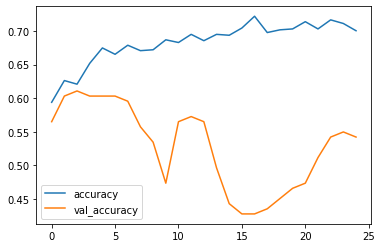

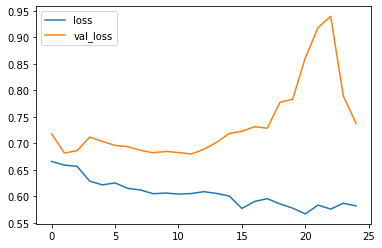

In [49]:
history = model.fit(generator.flow(train_imgs, 
                                   train_df,
                                   batch_size=BATCH_SIZE), 
                    epochs=EPOCHS,
                    steps_per_epoch=len(train_imgs)/BATCH_SIZE,
                    callbacks=[es_callback, reduce_lr],
                    validation_data=(val_imgs, val_df))


pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.show()

**KITA COBA PREDICT**

In [ ]:
#/content/cataractdataset/2_cataract/cataract_002.png
#/content/cataractdataset/1_normal/NL_019.png

img_path = '/content/dataset/1_normal/NL_060.png'
# img_path = '/content/dataset/2_cataract/cataract_010.png'

img = keras.preprocessing.image.load_img(
    img_path, target_size=(IMG_HEIGHT, IMG_WIDTH)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array/255.0)
asd = img_array/255
# predictions.dtype
plt.imshow(img)
print(
   img_array, predictions
)

**CONVERT TO TFLITE**

In [ ]:
export_dir= 'saved_model1/'
tf.saved_model.save(model,export_dir)

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [ ]:
tflite_model_file = 'converted_model_semogauint.tflite'

with open(tflite_model_file,"wb") as f:
  f.write(tflite_model)